# Assignment: 2D radioactive lighthouse location using MCMC

As before, a radioactive source that emits gamma rays randomly in time but uniformly in angle is placed at $(x_0, y_0)$.  The gamma rays are detected on the $x$-axis and these positions are saved, $x_k$, $k=1,2,\cdots, N$.  Given these observed positions, the problem is to estimate the location of the source.

Unlike before, we will not assume that $y_0$ is known. Your task is to estimate both $x_0$ and $y_0$.  Since we are using Bayesian methods, this means finding the joint posterior for $x_0$ and $y_0$, given the data on where the gamma rays were detected.

You will combine the results and Python code from the `radioactive_lighthouse_exercise.ipynb` and `parameter_estimation_Gaussian_noise.ipynb` notebooks, sampling the posterior using `emcee` and plotting it using `corner`.


## Learning goals:

* Be able to re-use markdown and Python from existing notebooks to perform similar tasks (even if not understanding all details); e.g., generating data, sampling via MCMC, making plots.
* Successfully apply the basic ideas of Bayesian statistics: Bayes theorem, priors, sampling of posteriors.
* Successfully analyze results (with hints).
* Try out markdown.

Note: you shouldn't need to recalculate anything; focus on the notebook ingredients.

## Expressions

The posterior we want is:

$$ p(x_0, y_0 | \{x_k\}, I) \overset{?}{=}
$$

*Using $\LaTeX$, fill in the right side of the equation for Bayes' rule as it applies in this case.* 


*Then add below the expression for the likelihood in this case (replace the dots with the correct form and fill in the right side):*

$$  p(\{x_k\} | \cdots) \overset{?}{=}
$$


*Describe in words what you will use for the prior:*

*Do you need to find an expression for the denominator pdf?  Explain.*

## Python imports

You will need to import emcee and corner.  The best way to do this is to follow the instructions for making an environment (see Carmen page).  An alternative is to install them separately using (at the command line):

`conda install -c astropy emcee`

`conda install -c astropy corner`

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()      
sns.set_context("talk")
import numpy as np
import scipy.stats as stats
from scipy.stats import cauchy, uniform
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 

## Generating the data

Copy-and-paste here the code from `radioactive_lighthouse_exercise.ipynb` used to generate the $x_k$ points.  Note that you have control over where the true position is but also the size of the dataset.  You will want to adjust both later. It is recommended to add the code that plots the distribution of the data (to verify it is the same as before), but this is not required.

maximum =  129.97811635173375
minimum =  -138.76643882238028


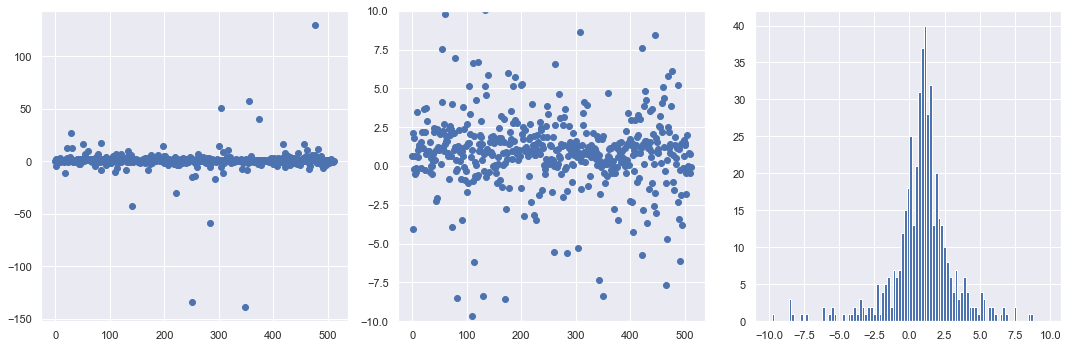

In [2]:
# True location of the radioactive source
x0_true = 1.
y0_true = 1.

# Generate num_pts random numbers distributed according to dist and plot 
num_pts = 512
x_pts = np.arange(num_pts)

# Distribution knowing where the source is: scipy.stats.cauchy(loc, scale)
dist = cauchy(x0_true, y0_true)
dist_pts = dist.rvs(num_pts)  

# Make some plots!
fig = plt.figure(figsize=(15,5))

# First plot all the points, letting it autoscale the counts
ax_1 = fig.add_subplot(1,3,1)
ax_1.scatter(x_pts, dist_pts)  

# Repeat but zoom in to near the origin
ax_2 = fig.add_subplot(1,3,2)
ax_2.scatter(x_pts, dist_pts)
ax_2.set_ylim(-10.,10.)

# Finally make a zoomed-in histogram
ax_3 = fig.add_subplot(1,3,3)
out = ax_3.hist(dist_pts, bins=np.arange(-10., 10., 0.2))

# Print out the numerical limits (max and min)
print('maximum = ', np.amax(dist_pts))
print('minimum = ', np.amin(dist_pts))

fig.tight_layout()

## PDFs for applying Bayes' rule

*Adapt code from the two notebooks to express the logarithms of the prior, likelihood, and posterior for this case.*

In [3]:
def log_prior(x0, y0_true, x_min=-4., x_max=+4.):
    """
    Log uniform prior from x_min to x_max.  Not normalized!
    """
    if (x0 > x_min) and (x0 < x_max):
        return 0.
    else:
        return -np.inf    # log(0) = -inf
    
def log_likelihood(x0, y0_true, dist_pts, N_max): 
    """
    Log likelihood for the first N_max points of the dist_pts array,
    assuming independent.  Not normalized!  
    """
    L_pts = -np.log(y0_true**2 + (dist_pts[0:N_max] - x0)**2)
    return sum(L_pts)

def posterior_calc(x0_pts, y0_true, dist_pts, N_max, x0_min=-4., x0_max=+4.):
    """
    Calculate the posterior for a set of x0_pts given y0 (y0_true) and a
    list of N_max x_k observations (dist_pts).
    """    
    log_L_pts = [log_likelihood(x0, y0_true, dist_pts, N_max) \
                 for x0 in x0_pts]
    log_L_pts -= np.amax(log_L_pts)  # subtract maximum of log likelihood

    log_prior_pts = [log_prior(x0, y0_true, x0_min, x0_max) \
                     for x0 in x0_pts]

    posterior_pts = np.exp(log_prior_pts + log_L_pts)
    return posterior_pts
  
def lighthouse_stats(dist_pts, N_max, x0_pts, posterior_pts):
    """
    Given an array of N_max observed detection points (dist_pts) and a
    posterior pdf (posterior_pts) for an array of x0 points (x0_pts), return
    the mean of dist_pts and the mode and mean of the posterior. 
    """
    mean_dist = np.mean(dist_pts[0:N_max])
    max_posterior = x0_pts[np.argmax(posterior_pts)]
    mean_posterior = np.sum(x0_pts * posterior_pts) / np.sum(posterior_pts)
    return mean_dist, max_posterior, mean_posterior

## Run MCMC

*Copy code to run `emcee` and make any necessary changes.*

In [ ]:
# Add the code to run emcee

## Generate figures

Note: you do not need to do the maximum likelihood estimates that were added to the corner plot for the Gaussian noise case.  You can skip that part of the code.

In [ ]:
# Add the code to make a corner plot

## Analysis

Summarize the results for the following investigations.  You can simply add to the cell containing the questions or else start new cells.

1. *Run the notebook 10 times (which will generate 10 different sets of random data).  Record the values of $x_0$ and $y_0$ and their uncertainties given on the corner plot for each run.  Is the actual spread of values consistent with the given uncertainties?* <br/><br/>

2. *Increase the number of data points by a factor of 10.  By how much does the width of the posterior shrink?  Is this expected?* <br/><br/>

3. *What does increasing the number of MC steps per walker do?* <br/><br/>

4. *Try changing `x0_true` and `y0_true`.  Does it still work?* <br/><br/>